TimeSeries Forecasting

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Reading files and joining data

In [11]:
df1 = pd.read_csv('Raw_data_1Hr_2019_site_5345_Sector-51_Gurugram_HSPCB_1Hr.csv')
df2 = pd.read_csv('Raw_data_1Hr_2020_site_5345_Sector-51_Gurugram_HSPCB_1Hr.csv')
df3 = pd.read_csv('Raw_data_1Hr_2021_site_5345_Sector-51_Gurugram_HSPCB_1Hr.csv', encoding = 'iso-8859-1')
df4 = pd.read_csv('Raw_data_1Hr_2022_site_5345_Sector-51_Gurugram_HSPCB_1Hr.csv')
df2020to2022 = pd.concat([df2, df3, df4])
df2020to2022

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2020-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2020-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2020-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,83.05,153.82,2.90,31.85,18.96,102.88,4.69,0.62,31.09,...,1.26,13.74,99.33,0.21,174.69,0.0,0.0,3.95,NaN,NaN
8756,2022-12-31 20:00:00,83.88,155.32,4.07,31.42,19.68,101.47,5.05,0.70,32.72,...,1.37,13.01,99.63,0.22,328.08,0.0,0.0,4.20,NaN,NaN
8757,2022-12-31 21:00:00,91.25,168.95,9.77,33.59,24.76,108.49,5.24,0.86,30.27,...,1.58,12.35,99.63,0.50,197.22,0.0,0.0,4.38,NaN,NaN
8758,2022-12-31 22:00:00,105.15,194.85,17.43,33.66,31.56,108.73,5.24,1.11,25.23,...,1.96,11.81,99.63,0.28,186.10,0.0,0.0,4.82,NaN,NaN


Understanding the encoding of file
- This makes it possible to read file using pandas. Most files don't need it as they are UTF-8 encoded

In [1]:
import chardet

# Open the file in binary mode
with open('combined_data20to22.csv', 'rb') as file:
    raw_data = file.read()

# Detect the encoding
result = chardet.detect(raw_data)
encoding = result['encoding']
print(f"The detected encoding is: {encoding}")


The detected encoding is: utf-8


Preparing Data for filling missing values and dropping empty features

In [13]:
df = df2020to2022
# Parse the Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')
df.set_index('Timestamp', inplace=True)
# Drop columns with all NaN values to simplify the imputation process
df = df.dropna(axis=1, how='all')
# Separate the index and the data
df_index = df.index
numerical_data = df.values
df

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),...,Xylene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,83.05,153.82,2.90,31.85,18.96,102.88,4.69,0.62,31.09,2.24,...,NaN,NaN,1.26,13.74,99.33,0.21,174.69,0.0,0.0,3.95
2022-12-31 20:00:00,83.88,155.32,4.07,31.42,19.68,101.47,5.05,0.70,32.72,2.78,...,NaN,NaN,1.37,13.01,99.63,0.22,328.08,0.0,0.0,4.20
2022-12-31 21:00:00,91.25,168.95,9.77,33.59,24.76,108.49,5.24,0.86,30.27,3.02,...,NaN,NaN,1.58,12.35,99.63,0.50,197.22,0.0,0.0,4.38


In [14]:

import statsmodels.tsa.stattools as ts

def check_stationarity(df):
    """
    Check if the columns of the given DataFrame are stationary.

    Parameters:
    df (pd.DataFrame): The DataFrame to check.

    Returns:
    dict: A dictionary with column names as keys and their ADF test p-values as values.
    """
    results = {}
    
    for column in df.columns:
        adf_result = ts.adfuller(df[column].dropna())
        results[column] = adf_result[1]  # p-value of the test
    
    return results

# Example usage:
# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Load your data
stationarity_results = check_stationarity(df)
print(stationarity_results)


{'PM2.5 (µg/m³)': np.float64(3.093141807950936e-12), 'PM10 (µg/m³)': np.float64(2.2396681369907454e-13), 'NO (µg/m³)': np.float64(2.6352277224613934e-21), 'NO2 (µg/m³)': np.float64(6.260996699710782e-13), 'NOx (ppb)': np.float64(1.6322713068005625e-16), 'NH3 (µg/m³)': np.float64(9.405887921574332e-10), 'SO2 (µg/m³)': np.float64(8.856051305650052e-16), 'CO (mg/m³)': np.float64(9.575627133556615e-16), 'Ozone (µg/m³)': np.float64(3.440664085358689e-10), 'Benzene (µg/m³)': np.float64(3.077135918621845e-09), 'Toluene (µg/m³)': np.float64(0.001045535755099919), 'Xylene (µg/m³)': np.float64(3.564089885043469e-14), 'Eth-Benzene (µg/m³)': np.float64(1.9903677473904648e-07), 'MP-Xylene (µg/m³)': np.float64(3.47952353827055e-19), 'AT (°C)': np.float64(0.004074441472363299), 'RH (%)': np.float64(3.005996772441188e-07), 'WS (m/s)': np.float64(3.794695122362429e-23), 'WD (deg)': np.float64(6.204592106369643e-19), 'RF (mm)': np.float64(2.5140891500359567e-30), 'TOT-RF (mm)': 0.0, 'SR (W/mt2)': np.flo

In [15]:
def identify_stationary_columns(p_values, threshold=0.05):
    """
    Identify which columns are stationary based on their p-values.

    Parameters:
    p_values (dict): A dictionary with column names as keys and their ADF test p-values as values.
    threshold (float): The p-value threshold for determining stationarity (default is 0.05).

    Returns:
    list: A list of column names that are stationary.
    """
    stationary_columns = [column for column, p_value in p_values.items() if p_value < threshold]
    return stationary_columns

# Example usage:
stationary_columns = identify_stationary_columns(stationarity_results)
print(stationary_columns)

['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)']


Imputing The Missing Values

In [16]:
from sklearn.impute import KNNImputer
# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(numerical_data)

# Create a DataFrame with the imputed data and original column names and index
df_imputed = pd.DataFrame(imputed_data, columns=df.columns, index=df_index)

# Verify the Data
df_imputed


,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),...,Xylene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,116.58,218.152,2.978,23.316,16.952,78.112,7.936,1.056,27.458,1.526,...,5.644,11.650,4.294,12.56,83.132,1.342,141.85,0.0,0.0,7.278
2020-01-01 01:00:00,116.58,218.152,2.978,23.316,16.952,78.112,7.936,1.056,27.458,1.526,...,5.644,11.650,4.294,12.56,83.132,1.342,141.85,0.0,0.0,7.278
2020-01-01 02:00:00,116.58,218.152,2.978,23.316,16.952,78.112,7.936,1.056,27.458,1.526,...,5.644,11.650,4.294,12.56,83.132,1.342,141.85,0.0,0.0,7.278
2020-01-01 03:00:00,116.58,218.152,2.978,23.316,16.952,78.112,7.936,1.056,27.458,1.526,...,5.644,11.650,4.294,12.56,83.132,1.342,141.85,0.0,0.0,7.278
2020-01-01 04:00:00,116.58,218.152,2.978,23.316,16.952,78.112,7.936,1.056,27.458,1.526,...,5.644,11.650,4.294,12.56,83.132,1.342,141.85,0.0,0.0,7.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,83.05,153.820,2.900,31.850,18.960,102.880,4.690,0.620,31.090,2.240,...,0.000,4.172,1.260,13.74,99.330,0.210,174.69,0.0,0.0,3.950
2022-12-31 20:00:00,83.88,155.320,4.070,31.420,19.680,101.470,5.050,0.700,32.720,2.780,...,0.000,26.380,1.370,13.01,99.630,0.220,328.08,0.0,0.0,4.200
2022-12-31 21:00:00,91.25,168.950,9.770,33.590,24.760,108.490,5.240,0.860,30.270,3.020,...,0.000,4.012,1.580,12.35,99.630,0.500,197.22,0.0,0.0,4.380


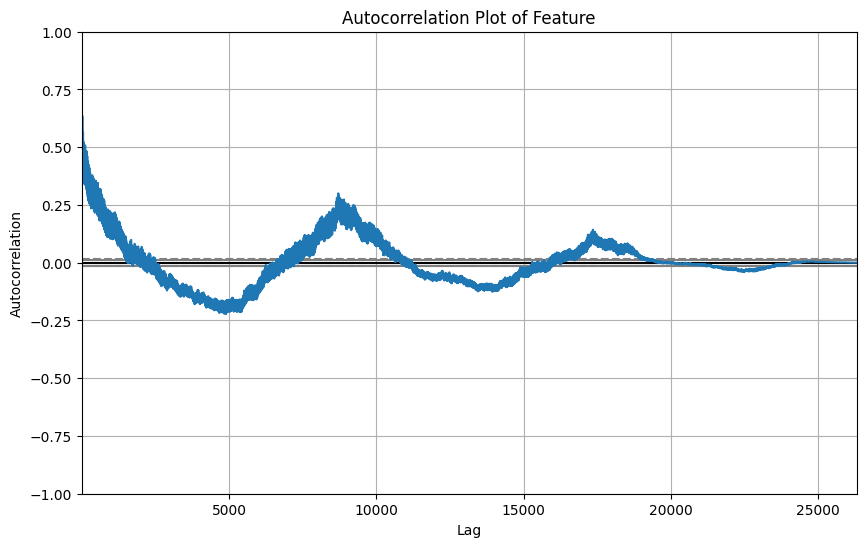

In [17]:
from pandas.plotting import autocorrelation_plot

# Load your dataset
data = df_imputed

# Select the feature for which you want to plot the autocorrelation
feature_series = data['PM2.5 (µg/m³)']

# Create the autocorrelation plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(feature_series)
plt.title('Autocorrelation Plot of Feature')
plt.show()

In [18]:
result = check_stationarity(df_imputed)
print(identify_stationary_columns(result))

['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)']


In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df_imputed.drop(columns=['PM2.5 (µg/m³)']).fillna(0)  # Features
y = df_imputed['PM2.5 (µg/m³)'].fillna(0)  # Target

model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]
print("Selected Features: ", selected_features)


Selected Features:  Index(['PM10 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Benzene (µg/m³)',
       'Xylene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'RF (mm)',
       'TOT-RF (mm)'],
      dtype='object')


In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
importance = lasso.coef_

selected_features = X.columns[importance != 0]
print("Selected Features: ", selected_features)


Selected Features:  Index(['PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)',
       'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)',
       'Toluene (µg/m³)', 'Xylene (µg/m³)', 'Eth-Benzene (µg/m³)',
       'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)',
       'TOT-RF (mm)', 'SR (W/mt2)'],
      dtype='object')


In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_

selected_features = X.columns[importances > np.mean(importances)]
print("Selected Features: ", selected_features)


Selected Features:  Index(['PM10 (µg/m³)', 'CO (mg/m³)', 'AT (°C)'], dtype='object')


Mean Squared Error:  798.9355686253158
R-squared:  0.8890557920714746


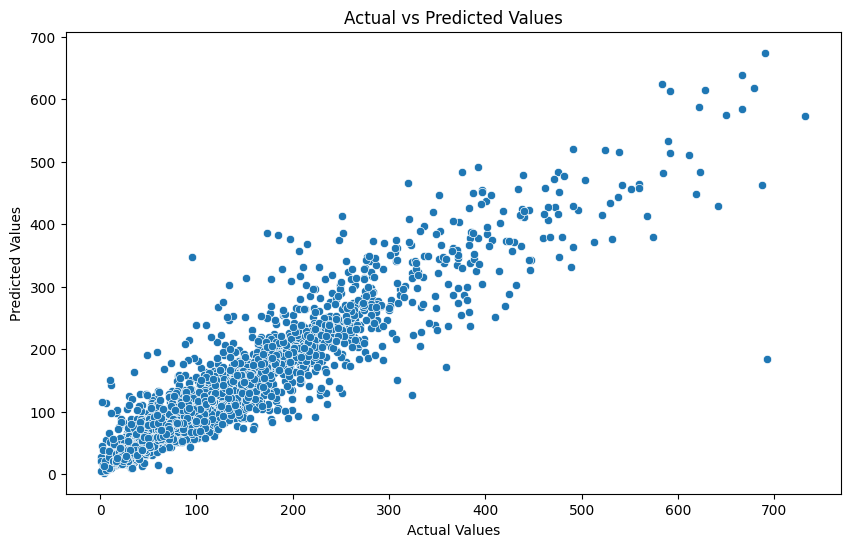

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


C:\Users\Ajay Kumar\Desktop\Git Repos\MachineLearning\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\Ajay Kumar\Desktop\Git Repos\MachineLearning\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\Ajay Kumar\Desktop\Git Repos\MachineLearning\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


ARIMA Mean Squared Error:  8402.200077111549
ARIMA R-squared:  -0.12159328160148286


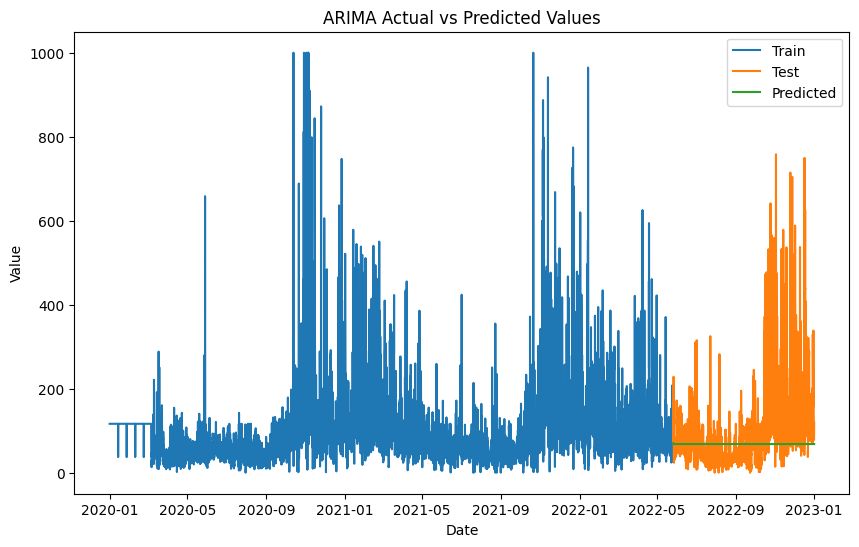

In [26]:
from statsmodels.tsa.api import VAR

# Assuming 'data' is a DataFrame with multiple time series
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit VAR model
model = VAR(train)
model_fit = model.fit(maxlags=5)

# Make predictions
y_pred = model_fit.forecast(model_fit.y, steps=len(test))
y_pred = pd.DataFrame(y_pred, index=test.index, columns=test.columns)

# Calculate metrics for one of the time series
mse = mean_squared_error(test.iloc[:, 0], y_pred.iloc[:, 0])
r2 = r2_score(test.iloc[:, 0], y_pred.iloc[:, 0])

print("VAR Mean Squared Error: ", mse)
print("VAR R-squared: ", r2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.iloc[:, 0], label='Train')
plt.plot(test.index, test.iloc[:, 0], label='Test')
plt.plot(test.index, y_pred.iloc[:, 0], label='Predicted')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("VAR Actual vs Predicted Values")
plt.legend()
plt.show()


In [27]:
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_imputed is your DataFrame
features = ['PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)',
            'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)',
            'Toluene (µg/m³)', 'Xylene (µg/m³)', 'Eth-Benzene (µg/m³)',
            'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)',
            'TOT-RF (mm)', 'SR (W/mt2)']

# Preparing the data
data = df_imputed[['PM2.5 (µg/m³)'] + features]
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Training the VAR model
model = VAR(train)
model_fitted = model.fit(maxlags=15, ic='aic')

# Making predictions
predictions = model_fitted.forecast(model_fitted.y, steps=len(test))
predicted_df = pd.DataFrame(predictions, index=test.index, columns=data.columns)

# Evaluate the model
y_true = test['PM2.5 (µg/m³)']
y_pred = predicted_df['PM2.5 (µg/m³)']

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

# Print evaluation metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Plot Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


C:\Users\Ajay Kumar\Desktop\Git Repos\MachineLearning\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


AttributeError: 'VARResults' object has no attribute 'y'

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Data scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split data into training and test sets
train_scaled, test_scaled = scaled_data[:train_size], scaled_data[train_size:]

# Prepare the data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 1:]  # Features
        b = dataset[i + look_back, 0]       # PM2.5
        X.append(a)
        Y.append(b)
    return np.array(X), np.array(Y)

look_back = 10  # Number of previous time steps to use as input
X_train, y_train = create_dataset(train_scaled, look_back)
X_test, y_test = create_dataset(test_scaled, look_back)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Inverse scale the predictions
y_test_inv = scaler.inverse_transform([y_test] + [np.zeros(y_test.shape)] * (scaled_data.shape[1] - 1))[:, 0]
y_pred_inv = scaler.inverse_transform([y_pred[:, 0]] + [np.zeros(y_pred.shape[0])] * (scaled_data.shape[1] - 1))[:, 0]

# Evaluate the model
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

# Print evaluation metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Plot Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.show()


C:\Users\Ajay Kumar\Desktop\Git Repos\MachineLearning\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: object __array__ method not producing an array

In [ ]:
from fbprophet import Prophet
import pandas as pd

# Preparing the data for Prophet
df_prophet = df_imputed.rename(columns={'Timestamp': 'ds', 'PM2.5 (µg/m³)': 'y'})
for col in features:
    df_prophet[col] = df_imputed[col]

# Train-test split
train_size = int(len(df_prophet) * 0.8)
train, test = df_prophet[:train_size], df_prophet[train_size:]

# Model training
model = Prophet()
for col in features:
    model.add_regressor(col)

model.fit(train)

# Make predictions
future = model.make_future_dataframe(periods=len(test))
for col in features:
    future[col] = df_imputed[col].values

forecast = model.predict(future)

# Evaluate the model
y_true = test['y']
y_pred = forecast['yhat'].iloc[-len(test):]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

# Print evaluation metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Plot Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_true.reset_index(drop=True), label='Actual')
plt.plot(y_pred.reset_index(drop=True), label='Predicted')
plt.legend()
plt.show()


MAE: 26.549014389035896
RMSE: 46.83471969334029
R²: 0.7071951737367466


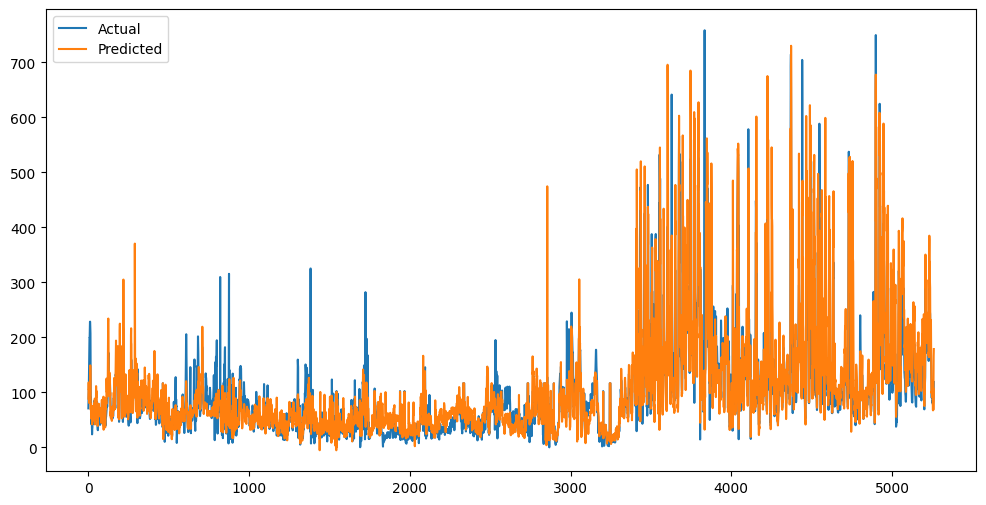

In [30]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Data scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split data into training and test sets
train_scaled, test_scaled = scaled_data[:train_size], scaled_data[train_size:]

# Train the model
model = XGBRegressor(objective='reg:squarederror')
X_train, y_train = train_scaled[:, 1:], train_scaled[:, 0]
X_test, y_test = test_scaled[:, 1:], test_scaled[:, 0]

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Inverse scale the predictions
y_test_inv = scaler.inverse_transform(np.hstack([y_test.reshape(-1, 1), X_test]))[:, 0]
y_pred_inv = scaler.inverse_transform(np.hstack([y_pred.reshape(-1, 1), X_test]))[:, 0]

# Evaluate the model
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

# Print evaluation metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Plot Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.show()


In [37]:
df_imputed.to_csv('combined_data20to22V2.csv', index = False)

In [36]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\Ajay Kumar\Desktop\Git Repos\MachineLearning\notebooks
